In [1]:
import os
import rasterio
import geopandas as gpd
from shapely.geometry import Polygon

<Axes: >

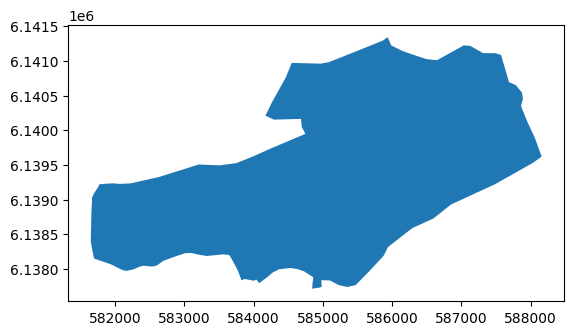

In [2]:
aoi = gpd.read_file('input_vector_data/aoi_predict.geojson')
aoi.plot()

In [3]:
input_images = [img for img in os.listdir('images') if img.endswith('.jpg')]
print(input_images[:5])

inpath = 'images'
outpath = 'images/overlap'

['J-29-C-4-N-5.jpg', 'J-29-C-5-M-2.jpg', 'J-29-C-4-P-2.jpg', 'J-29-C-2-O-6.jpg', 'J-29-C-2-P-8.jpg']


In [4]:
if not os.path.isdir(outpath):
    os.makedirs(outpath)
    print('Directory was created')
else:
    print('Directory already exists')

Directory was created


In [ ]:
kwargs = {
    'driver': 'JPEG',
    'dtype': 'uint8',
    'crs': 'EPSG:32721', 
    'nodata': 0,
    'compress': 'lzw',
    'count': 3
}

for img in input_images:
    input_file = os.path.join(inpath, img)
    output_file = os.path.join(outpath, img)

    raster = rasterio.open(input_file)

    coords = [raster.bounds[i] for i in range(4)]

    lon_point_list = [coords[0], coords[2], coords[2], coords[0]]
    lat_point_list = [coords[3], coords[3], coords[1], coords[1]]

    bbox = Polygon(zip(lon_point_list, lat_point_list))

    if not bbox.intersects(aoi.geometry[0]):
        print('No hay intersección entre AOI e imagen input.')
    else:
        out_meta = raster.meta.copy()
        out_meta.update(kwargs)

        with rasterio.open(
            output_file,
            mode= 'w',
            **out_meta
        ) as dst:
            dst.write_band(1, raster.read(1))
            dst.write_band(2, raster.read(2))
            dst.write_band(3, raster.read(3))
        print(f'Saved image {output_file}')

No hay intersección entre AOI e imagen input.
Saved image images/overlap/J-29-C-5-M-2.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Saved image images/overlap/J-29-C-2-P-8.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Saved image images/overlap/J-29-C-5-N-6.jpg
Saved image images/overlap/J-29-C-5-N-3.jpg
Saved image images/overlap/J-29-C-6-M-1.jpg
Saved image images/overlap/J-29-C-5-M-3.jpg
Saved image images/overlap/J-29-C-5-O-2.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Saved image images/overlap/J-29-C-5-N-5.jpg
No hay intersección entre AOI e imagen input.
Saved image images/overlap/J-29-C-5-O-1.jpg
No hay intersección entre AOI e imagen input.
Saved image images/overlap/J-29-C-3-O-7.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Saved im